<h1 style="
  font-size: 55px; 
  text-align: center; 
  font-family: 'Poppins', sans-serif; 
  text-shadow: 2px 2px 5px rgba(70, 145, 196, 0.84);
  letter-spacing: 2px;
">
  <b>📊 Data Visualization</b>
</h1>
<hr style="width: 60%; border: 2px solid rgba(25, 58, 80, 0.85); border-radius: 5px;">


#### **=> Malak Ahmed**
---

<h4 style="
  color: rgba(53, 170, 206, 0.84);
  font-family: 'Poppins', sans-serif;
  font-weight: 600;
  letter-spacing: 0.5px;
">
  <b>Import Libraries</b>
</h4>


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('cleaned_merged_data.csv')
df.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,...,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP,LOAN_ACTIVITY_SCORE,RATIO_AMT_CREDIT
0,1,Cash loans,M,202500.0,Working,Secondary / secondary special,Single / not married,House/apartment,Labor,1.0,...,Approved,606,Cash through the bank,New,POS,Stone,24.0,Middle,2,0.440373
1,0,Cash loans,F,270000.0,Others,Higher education,Married,House/apartment,Admin,2.0,...,Approved,746,Cash through the bank,Repeater,Cash,Credit and cash offices,12.0,Low,2,0.800834
2,0,Cash loans,F,270000.0,Others,Higher education,Married,House/apartment,Admin,2.0,...,Approved,828,Cash through the bank,Refreshed,POS,Stone,6.0,High,2,0.269530
3,0,Cash loans,F,270000.0,Others,Higher education,Married,House/apartment,Admin,2.0,...,Approved,2341,Cash through the bank,Refreshed,POS,Country-wide,12.0,High,2,0.052612
4,0,Revolving loans,M,67500.0,Working,Secondary / secondary special,Single / not married,House/apartment,Labor,1.0,...,Approved,815,Cash through the bank,New,POS,Regional / Local,4.0,High,2,0.148932


<h4 style="
  color:rgba(53, 170, 206, 0.84);
  font-family: 'Poppins', sans-serif;
  font-weight: 600;
  letter-spacing: 0.5px;
">
  <b>Q1:</b> What is the difference between accepted (1) and rejected (0) clients 
  in terms of <b>EXT_SOURCE_2</b> and <b>EXT_SOURCE_3</b>?
</h4>


---

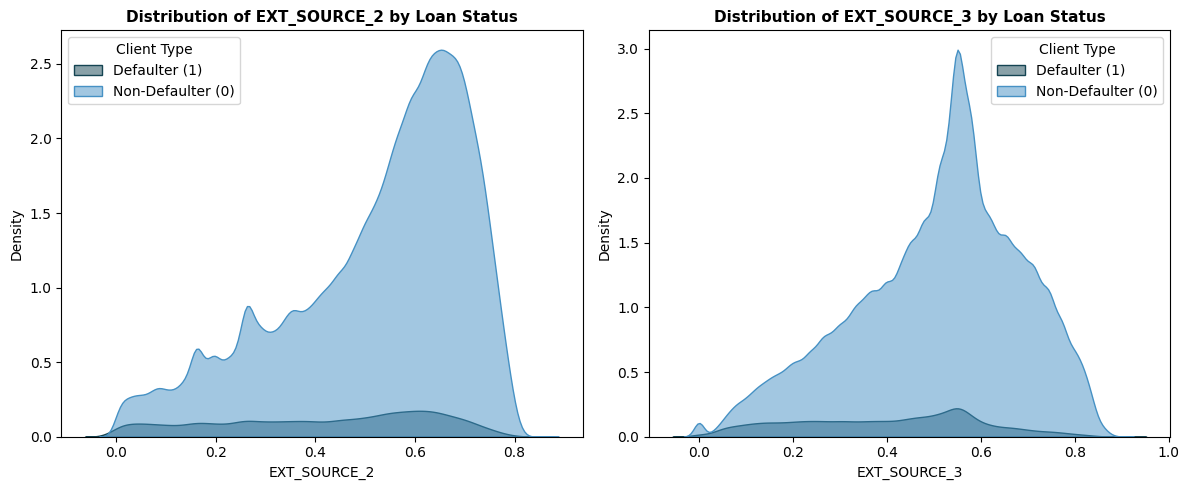

In [3]:
plt.figure(figsize=(12, 5))

# EXT_SOURCE_2 vs TARGET
plt.subplot(1, 2, 1)
sns.kdeplot(
    data=df, 
    x='EXT_SOURCE_2', 
    hue='TARGET', 
    fill=True, 
    alpha=0.5, 
    palette=[ '#4691c4', "#144452"]
)
plt.title('Distribution of EXT_SOURCE_2 by Loan Status', fontsize=11, fontweight='bold')
plt.xlabel('EXT_SOURCE_2')
plt.ylabel("Density")
plt.legend(title='Client Type', labels=[ 'Defaulter (1)', 'Non-Defaulter (0)'])
plt.grid(False)  

# EXT_SOURCE_3 vs TARGET
plt.subplot(1, 2, 2)
sns.kdeplot(
    data=df, 
    x='EXT_SOURCE_3', 
    hue='TARGET', 
    fill=True, 
    alpha=0.5, 
    palette=['#4691c4', "#144452"]
)

plt.title('Distribution of EXT_SOURCE_3 by Loan Status', fontsize=11, fontweight='bold')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel("Density")
plt.legend(title='Client Type', labels=[ 'Defaulter (1)', 'Non-Defaulter (0)'])
plt.grid(False) 

plt.tight_layout()
plt.show()


<h4 style="
  color:rgba(53, 170, 206, 0.84);
  font-family: 'Poppins', sans-serif;
  font-weight: 600;
  letter-spacing: 0.5px;
">
  <b>Q2:</b> Distribution of Annual Income by Loan Status</b>?
</h4>


---

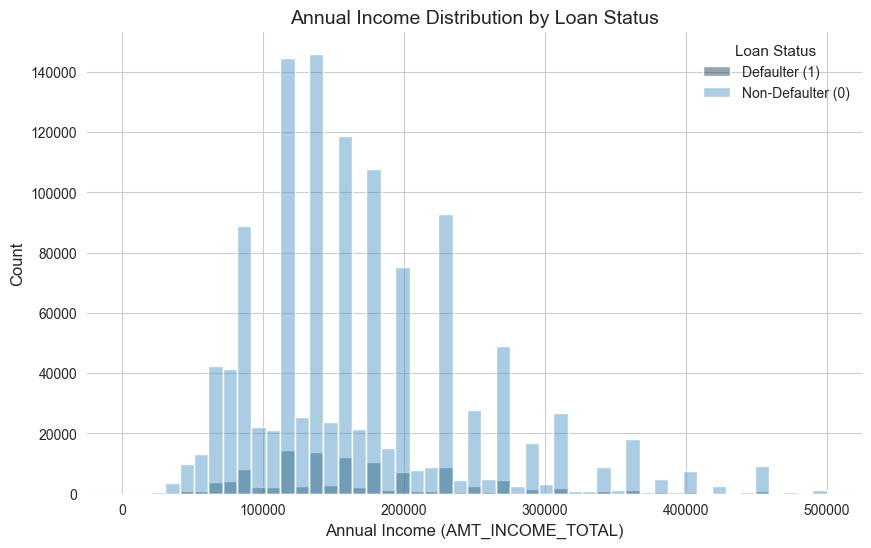

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

sns.histplot(
    data=df, 
    x='AMT_INCOME_TOTAL', 
    hue='TARGET', 
    bins=np.linspace(0, 500000, 50), 
    palette=['#4691c4', "#0F3C49"],
    alpha=0.45,
    edgecolor=None
)

plt.title('Annual Income Distribution by Loan Status', fontsize=14, fontweight='medium')
plt.xlabel('Annual Income (AMT_INCOME_TOTAL)', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.legend(
    title='Loan Status', 
    labels=['Defaulter (1)', 'Non-Defaulter (0)'],
    frameon=False,
    fontsize=10,
    title_fontsize=11
)

sns.despine(left=True, bottom=True)

plt.show()


<h4 style="
  color:rgba(53, 170, 206, 0.84);
  font-family: 'Poppins', sans-serif;
  font-weight: 600;
  letter-spacing: 0.5px;
">
  <b>Q3: </b>How are defaulters and non-defaulters distributed across the yield groups (NAME_YIELD_GROUP)?</b>
</h4>

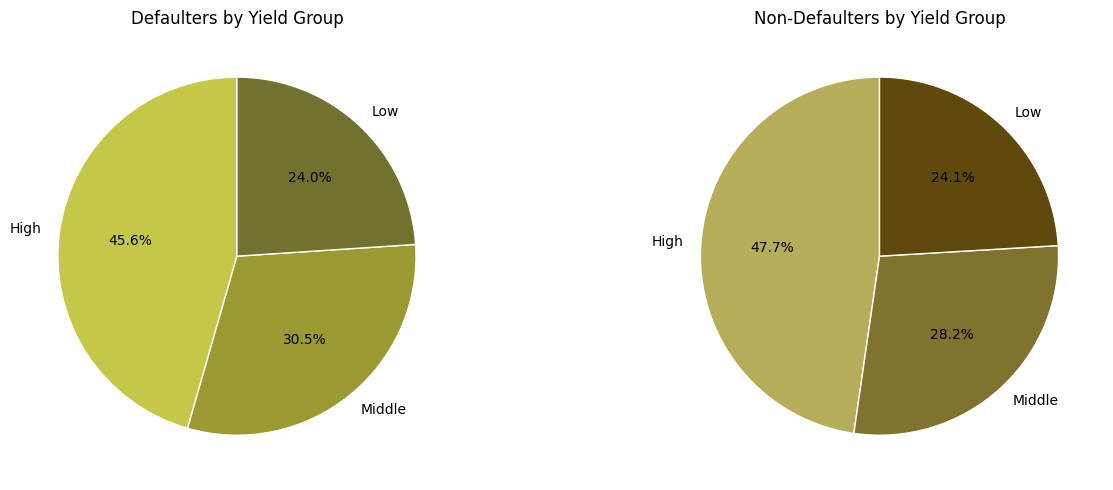

In [5]:
defaulter_counts = df[df["TARGET"] == 1]["NAME_YIELD_GROUP"].value_counts()
nondefaulter_counts = df[df["TARGET"] == 0]["NAME_YIELD_GROUP"].value_counts()

plt.figure(figsize=(14,5))

# Defaulters
plt.subplot(1, 2, 1)
plt.pie(
    defaulter_counts, 
    labels=defaulter_counts.index, 
    autopct='%1.1f%%',
    colors=["#c5c749", "#9B9932", "#71722F"],
    startangle=90,
    wedgeprops={'edgecolor':'white'}
)
plt.title("Defaulters by Yield Group")

# Non-Defaulters
plt.subplot(1, 2, 2)
plt.pie(
    nondefaulter_counts, 
    labels=nondefaulter_counts.index, 
    autopct='%1.1f%%',
    colors=["#b6ad5b", "#817230", "#5f490d"],
    startangle=90,
    wedgeprops={'edgecolor':'white'}
)
plt.title("Non-Defaulters by Yield Group")

plt.tight_layout()
plt.show()


<h4 style="
  color:rgba(53, 170, 206, 0.84);
  font-family: 'Poppins', sans-serif;
  font-weight: 600;
  letter-spacing: 0.5px;
">
  <b>Q4:</b>How does the client’s family status (NAME_FAMILY_STATUS) affect the loan repayment status (TARGET)?</b>?
</h4>


---


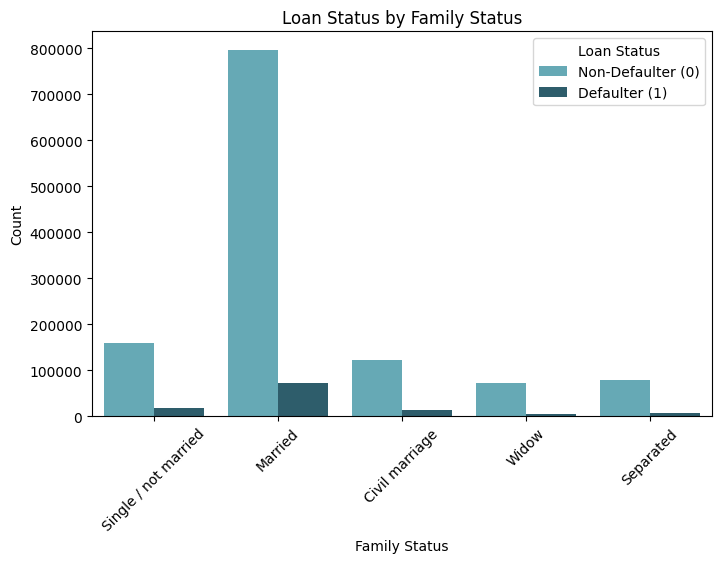

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='NAME_FAMILY_STATUS',
    hue='TARGET',
    palette={0:'#59b2c2', 1:'#246275'}
)
plt.title('Loan Status by Family Status')
plt.xlabel('Family Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', labels=['Non-Defaulter (0)', 'Defaulter (1)'])
plt.show()


<h4 style="
  color:rgba(53, 170, 206, 0.84);
  font-family: 'Poppins', sans-serif;
  font-weight: 600;
  letter-spacing: 0.5px;
">
  <b>Q5:</b>How does the client’s occupation type (OCCUPATION_TYPE) affect the probability of loan default (TARGET)?</b>?
</h4>

---

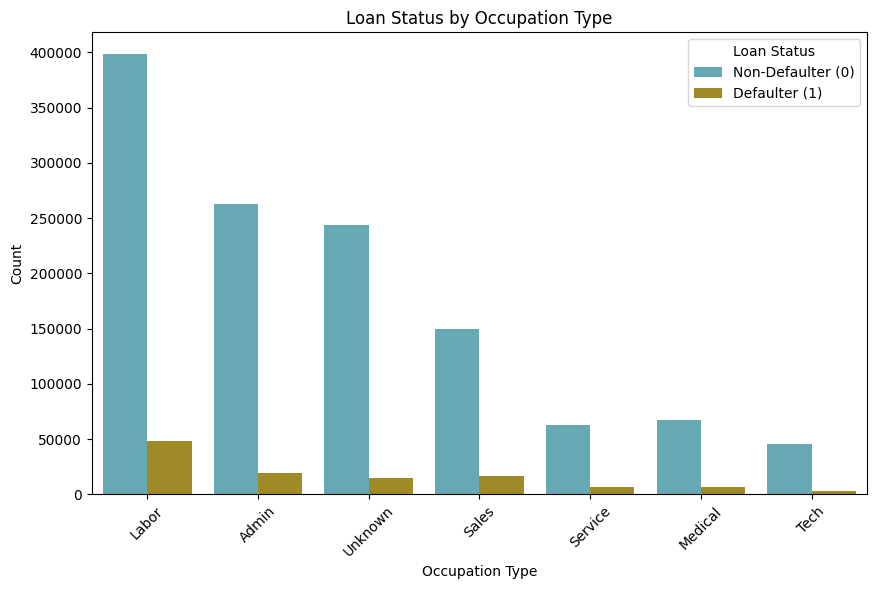

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    x='OCCUPATION_TYPE',
    hue='TARGET',
    palette={0:'#59b2c2', 1:"#B49713"}
)
plt.title('Loan Status by Occupation Type')
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', labels=['Non-Defaulter (0)', 'Defaulter (1)'])
plt.show()
